# Imports

In [117]:
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import colors
import sdf

plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (10, 8)
import imageio as imageio
import glob

# Parameters

In [118]:
m = 9.10938356e-31
e = 1.60217662e-19
c = 299792458
epsilon = 8.85e-12

def getEr(lambd):
    w = 2 * 3.14159 * c / lambd
    return m * w * c / e

In [119]:
lambd = 1e-6
FACTOR = 7
NX = 16000
X_MIN = 20
Er = getEr(lambd)
omega0 = 2*np.pi*3e8/lambd
tau = 2*np.pi/omega0
T = 20*tau
T_MAX = 40*tau
nc = epsilon*m*omega0**2/e**2
n0 = FACTOR*nc
Er, omega0, tau, T, T_MAX

(3210698360819.1753,
 1884955592153876.0,
 3.3333333333333332e-15,
 6.666666666666667e-14,
 1.3333333333333334e-13)

In [120]:
omega_max = 20*omega0
f_max = omega_max/(2*np.pi)
dt_min = 1/(2*f_max)
dt_min*1e15

0.08333333333333333

In [121]:
dt = 0.08e-15
f_max = 1/dt
omega_max = 2*np.pi*f_max
omega_max/omega0

41.666666666666664

In [122]:
all_files = glob.glob("before/*sdf")
len(all_files)

1669

In [123]:
X = np.linspace(-X_MIN, X_MIN, NX)
T = np.linspace(0, T_MAX, len(all_files))

## Plots

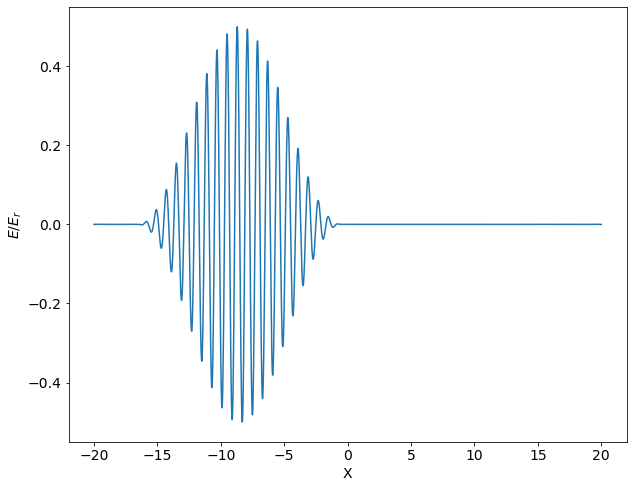

In [124]:
data = sdf.read(all_files[1000])
plt.plot(X, data.Electric_Field_Ey.data/Er)
plt.xlabel("X")
plt.ylabel("$E/E_r$");

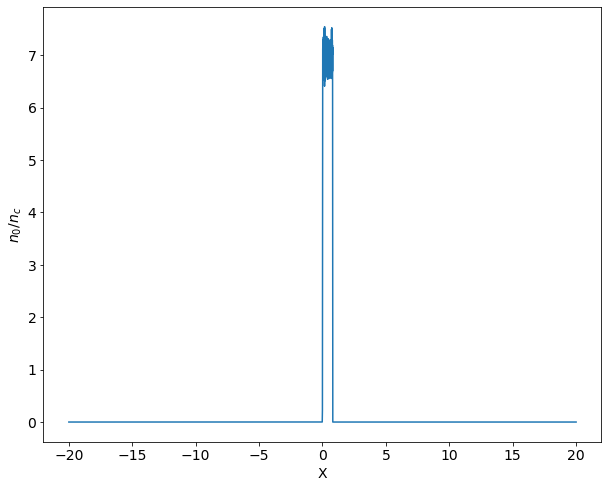

In [125]:
plt.plot(X, data.Derived_Number_Density_Electron.data/nc)
plt.xlabel("X")
plt.ylabel("$n_0/n_c$");

In [126]:
def get_field(id, component="y"):
    raw_data = sdf.read(all_files[id])
    comp = {
        "x": raw_data.Electric_Field_Ex,
        "y": raw_data.Electric_Field_Ey,
        "z": raw_data.Electric_Field_Ez,
    }
    field = comp[component].data
    return field


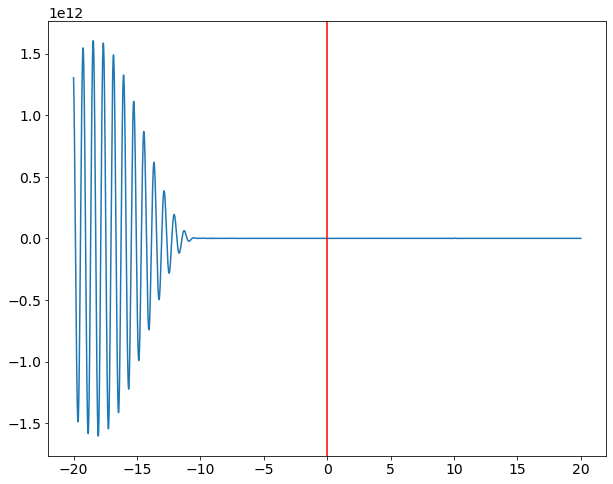

In [127]:
Ey = get_field(500)
plt.plot(X, Ey)
plt.axvline(0, color="red")
plt.show()


In [128]:
Et0 = np.zeros(len(all_files))
Et1 = np.zeros(len(all_files))
Et2 = np.zeros(len(all_files))
d = np.zeros((len(all_files), NX))
for i in range(len(all_files)):
    data = sdf.read(all_files[i])
    ey = data.Electric_Field_Ey.data
    Et0[i] = ey[100]
    Et1[i] = ey[4000]
    Et2[i] = ey[12000]
    d[i] = data.Derived_Number_Density_Electron.data


In [129]:
d.shape, Et1.shape, Et2.shape

((1669, 16000), (1669,), (1669,))

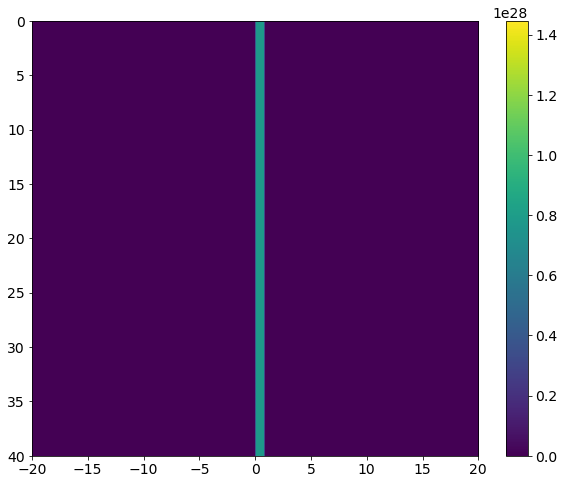

In [130]:
EXTENT = [-20,20,40,0]
plt.imshow(d, aspect="auto", extent=EXTENT)
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

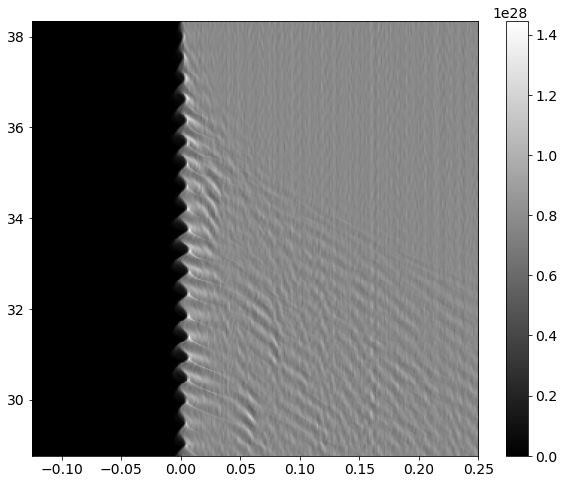

In [131]:
t_start = 1200
t_end = 1600
t_max = d.shape[0]
x_max = d.shape[1]
x_start = 2*3950
x_end = 2*4100
EXTENT = [20*(x_start-NX//2)/x_max,20*(x_end-NX//2)/x_max,40*t_start/t_max,40*t_end/t_max]
plt.imshow(d[t_start:t_end, x_start:x_end], aspect="auto", extent=EXTENT, cmap="gray")
cmap = colors.ListedColormap(["white", "black"])
plt.colorbar(cmap=cmap)

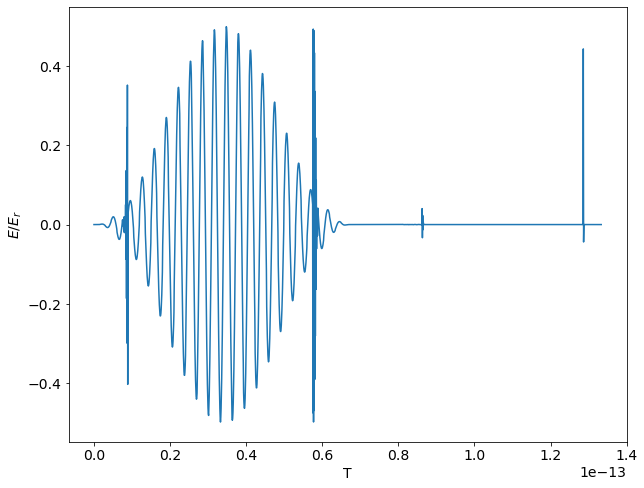

In [132]:
plt.plot(T, Et0/Er)
plt.xlabel("T")
plt.ylabel("$E/E_r$");

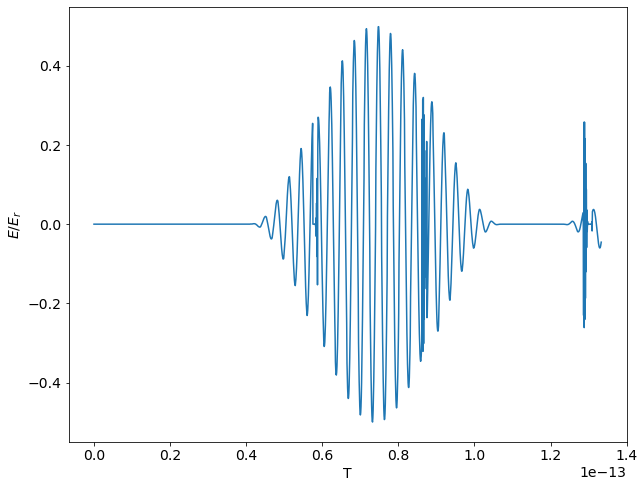

In [133]:
plt.plot(T, Et1/Er)
plt.xlabel("T")
plt.ylabel("$E/E_r$");

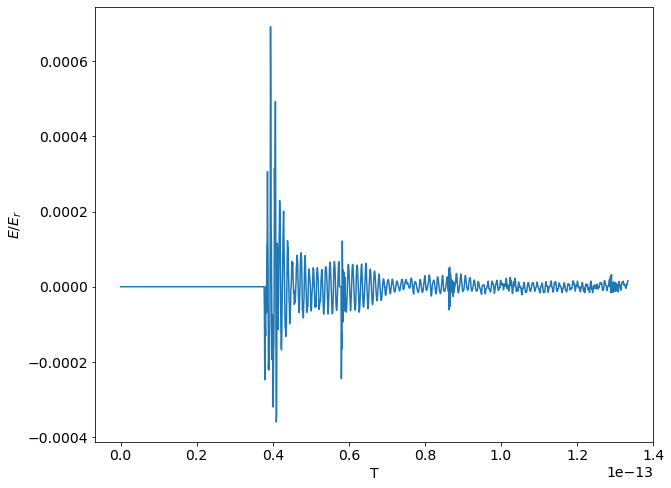

In [134]:
plt.plot(T, Et2/Er)
plt.xlabel("T")
plt.ylabel("$E/E_r$");

## FT

In [135]:
y0 = np.fft.fft(Et0)
y1 = np.fft.fft(Et1)
y2 = np.fft.fft(Et2)

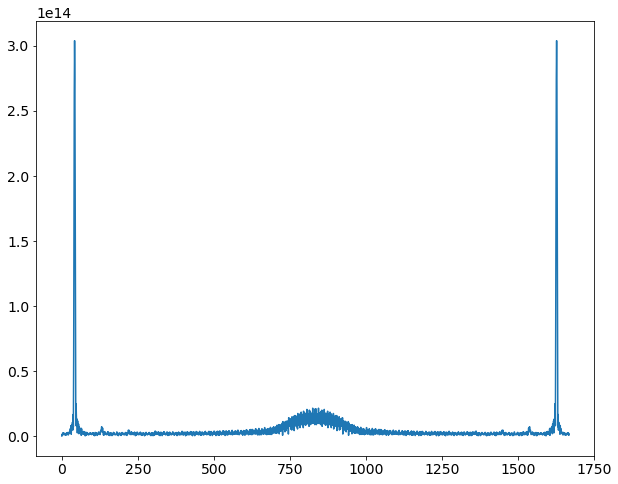

In [136]:
plt.plot(np.abs(y0));

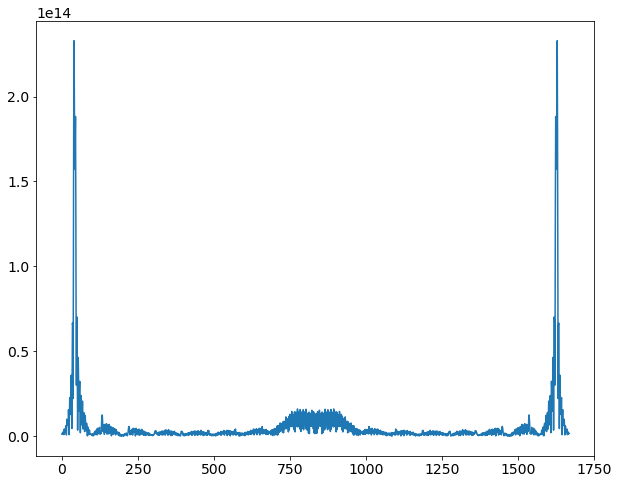

In [137]:
plt.plot(np.abs(y1));

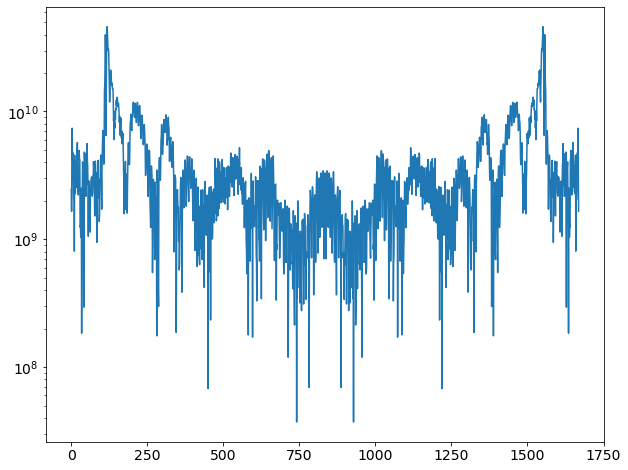

In [138]:
plt.plot(np.abs(y2))
plt.yscale("log")

In [139]:
y1_shift = np.fft.fftshift(y1)
y2_shift = np.fft.fftshift(y2)
y0 = np.fft.fftshift(y0)
y1_f = np.abs(y1_shift)/Er
y2_f = np.abs(y2_shift)/Er
y0_f = np.abs(y0)/Er

In [140]:
omega = np.linspace(-omega_max/2, omega_max/2, len(all_files))

In [141]:
omega_max/omega0

41.666666666666664

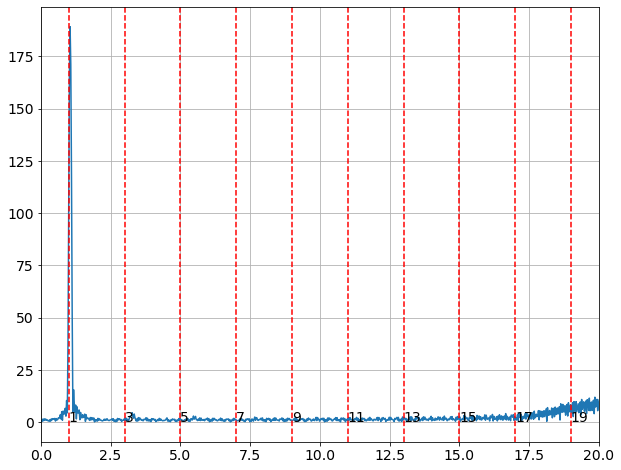

In [142]:
plt.plot(omega/omega0, 2*y0_f)
# plt.yscale("log")
points = np.arange(1,21,2)
for p in points:
    plt.axvline(p, color="red", linestyle="--")
    plt.annotate(f"{p}", (p, 1e-2))
plt.xlim(0,20)
plt.grid()

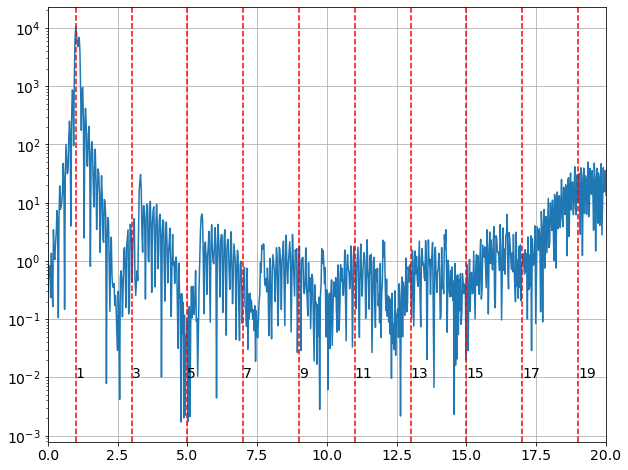

In [143]:
plt.plot(omega/omega0, 2*(y1_f)**2)
plt.yscale("log")
points = np.arange(1,21,2)
for p in points:
    plt.axvline(p, color="red", linestyle="--")
    plt.annotate(f"{p}", (p, 1e-2))
plt.xlim(0,20)
plt.grid()

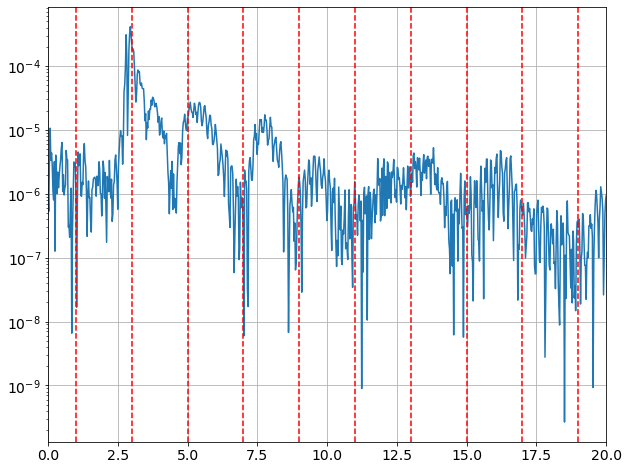

In [144]:
plt.plot(omega/omega0, 2*y2_f**2)
plt.yscale("log")
points = np.arange(1,21,2)
for p in points:
    plt.axvline(p, color="red", linestyle="--")
    plt.annotate(f"{p}", (p, 1e-2))
plt.xlim(0,20)
plt.grid()

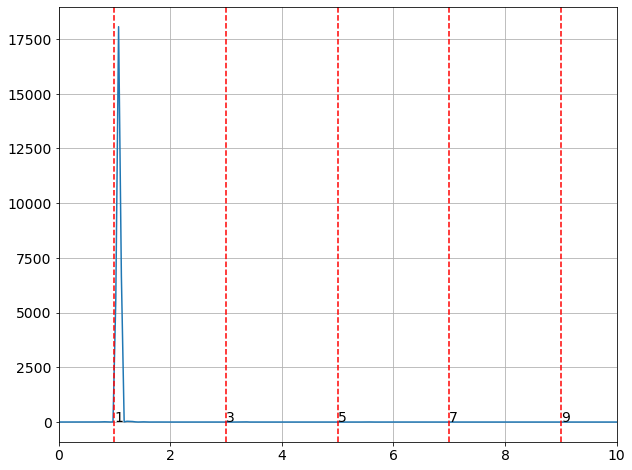

In [145]:
half = int(len(all_files)/2)
y0half = np.fft.fft(Et0[:half])
y0half_f = np.abs(np.fft.fftshift(y0half))/Er
omega = np.linspace(-omega_max/2, omega_max/2, half)
plt.plot(omega/omega0, 2*np.square(y0half_f))
# plt.yscale("log")
points = np.arange(1,21,2)
for p in points:
    plt.axvline(p, color="red", linestyle="--")
    plt.annotate(f"{p}", (p, 1e-2))
plt.xlim(0,10)
plt.grid()